# COVID Data Analysis for Germany

In the context for COVID-19 global pandemic, kaggle has initiated several [challenges](https://www.kaggle.com/tags/covid19) to encourage the data analysts around the world provide useful insights. However, most of the analyses and available data are in country level (with some exceptions such as China and the USA). Since I was personally more interested in the data from Germany, I decided to make my own dataset that includes the state level data from Germany. 

**Table of Contents**

1. [Data Source](#section1)

2. [Exploratory Data Analysis](#section2)

   2.1. [Trend Analysis](#section21)

**Disclaimer 1**: Thin notebook will be gradually updated as I want to include simulations and predictions.

**Disclaimer 2**: For the structure and type of analyses in this notebook I used the [notebook](https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions) a lot. It is a very well structured and well explained analysis and I recommend it for the analysis of the global data.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Data Source <a id="section1"></a>

The data is scraped from the [website of the Berliner Morgenpost](https://interaktiv.morgenpost.de/corona-virus-karte-infektionen-deutschland-weltweit/).  I used to fetch the data from the [website of the Robert Koch Institute](https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html) but it does not include the recovered cases. The data is uploaded daily to a [github repository](https://github.com/KeyvanSadri/covid-19-RKI) in the same format as the [John Hopkins University data](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data) which is vastly used for analyses.

In [2]:
url = 'https://interaktiv.morgenpost.de/corona-virus-karte-infektionen-deutschland-weltweit/data/Coronavirus.history.v2.csv?1584878843224'
headers = {'Accept': '*/*',
'Accept-Encoding': 'gzip, deflate, br',
'Accept-Language': 'de-DE,de;q=0.9,en-US;q=0.8,en;q=0.7',
'Cache-Control': 'no-cache',
'Connection': 'keep-alive',
'Cookie': '_ga=GA1.3.1111082207.1584440313; _gid=GA1.3.1177533010.1584440315; _ga=GA1.2.1111082207.1584440313; _gid=GA1.2.1177533010.1584440315; POPUPCHECK=1584526715486; _cb_ls=1; _cb=BQEUd7KUeelCLinKS; _gat_UA-76687329-1=1; _dc_gtm_UA-31059345-1=1; _chartbeat2=.1584440315676.1584461107849.1.Br-C7aD95vx4sXpbSDNar9aDbxQx0.1; _cb_svref=null; _chartbeat4=t=BX9BsyEa1iCClrvB4DeXuET2T8Ou&E=5&x=0&c=0.54&y=2172&w=722',
'Host': 'interaktiv.morgenpost.de',
'Pragma': 'no-cache',
'Referer': 'https://interaktiv.morgenpost.de/corona-virus-karte-infektionen-deutschland-weltweit/',
'Sec-Fetch-Dest': 'empty',
'Sec-Fetch-Mode': 'cors',
'Sec-Fetch-Site': 'same-origin',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'
}
payload={'1584878843224':''}

In [3]:
r = requests.get(url,params=payload,headers=headers)
r.encoding
r.encoding = 'utf-8'

Here I parse the text received from the request into a data frame.

In [4]:
df = pd.DataFrame([x.split(',') for x in r.text.split('\n')])
df.columns = df.iloc[0]
df = df[1:]
display(df.head())
print('Shape of the dataframe:', df.shape)

,parent,label,date,lon,lat,confirmed,recovered,deaths
1,China,Yunnan,2020-01-27,101.487,24.974,26,0,0
2,USA,Arizona,2020-01-27,-111.431221,33.729759,1,0,0
3,global,Singapur,2020-01-27,103.8333,1.2833,5,0,0
4,USA,Washington,2020-01-27,-121.490494,47.400902,1,0,0
5,Deutschland,Repatriierte,2020-01-27,null,null,0,0,0


Shape of the dataframe: (10260, 8)


# 2. Exploratory Data Analysis (EDA) <a id="section2"></a>

In the last cell we started the EDA by looking at the structure of the dataframe. Next, it is useful to know which countries are covered in the dataset.

In [5]:
print('The countries existing in the dataframe:', df.parent.unique())

The countries existing in the dataframe: ['China' 'USA' 'global' 'Deutschland' 'Australien' 'Kanada'
 'Kreuzfahrtschiffe und Sonstige' 'Frankreich' 'Großbritannien' 'Dänemark'
 'Niederlande' '']


As mentioned, the goal is to analyze the data from Germany. Later, we can use the John Hopkins data to include more countries for comparison and train models. The dataset covers data since January 2th.

I will exclude repatriated or cases without a state.

In [6]:
df_deutschland = df[(df.parent=='Deutschland') & (df.label!='Repatriierte') & (df.label!='nicht zugeordnet')]
print('Shapre of the dataframe for Germany: ', df_deutschland.shape, '\n')
print('List of the German States in the label column: ', df_deutschland.label.unique())
display(df_deutschland.head())

Shapre of the dataframe for Germany:  (1024, 8) 

List of the German States in the label column:  ['Baden-Württemberg' 'Bayern' 'Berlin' 'Brandenburg' 'Bremen' 'Hamburg'
 'Hessen' 'Mecklenburg-Vorpommern' 'Niedersachsen' 'Nordrhein-Westfalen'
 'Rheinland-Pfalz' 'Saarland' 'Sachsen' 'Sachsen-Anhalt'
 'Schleswig-Holstein' 'Thüringen']


,parent,label,date,lon,lat,confirmed,recovered,deaths
8,Deutschland,Baden-Württemberg,2020-01-27,9.147687,48.606091,0,0,0
28,Deutschland,Bayern,2020-01-27,11.658165,48.768814,1,0,0
29,Deutschland,Berlin,2020-01-27,13.40732,52.52045,0,0,0
30,Deutschland,Brandenburg,2020-01-27,14.124409,52.073056,0,0,0
31,Deutschland,Bremen,2020-01-27,8.731851,53.029599,0,0,0


The data is parsed from a text so the types of columns are still string. Let's convert the type and draw the confirmed cases in the state of Baden-Wurttemberg (BW).

In [7]:
df_deutschland.date = pd.to_datetime(df_deutschland.date,format='%Y-%m-%d')
df_deutschland.lon = pd.to_numeric(df_deutschland.lon)
df_deutschland.lat = pd.to_numeric(df_deutschland.lat)
df_deutschland.confirmed = pd.to_numeric(df_deutschland.confirmed)
df_deutschland.recovered = pd.to_numeric(df_deutschland.recovered)
df_deutschland.deaths = pd.to_numeric(df_deutschland.deaths)
df_deutschland = df_deutschland.reset_index(drop=True)
df_deutschland.tail()

C:\Users\ksadri\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,parent,label,date,lon,lat,confirmed,recovered,deaths
1019,Deutschland,Saarland,2020-03-30,6.961042,49.417880,800,47,9
1020,Deutschland,Sachsen,2020-03-30,13.349228,51.022904,1930,32,11
1021,Deutschland,Sachsen-Anhalt,2020-03-30,11.680630,51.926892,682,22,6
1022,Deutschland,Schleswig-Holstein,2020-03-30,9.713017,54.188254,1053,28,8
1023,Deutschland,Thüringen,2020-03-30,11.004142,50.894378,777,129,6


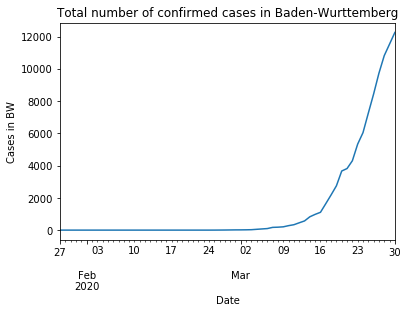

In [8]:
df_bw = df_deutschland[['date','confirmed']][df_deutschland.label=='Baden-Württemberg'].reset_index(drop=True)
df_bw = df_bw.set_index('date')
df_bw['confirmed'].plot()
plt.title('Total number of confirmed cases in Baden-Wurttemberg')
plt.xlabel('Date')
plt.ylabel('Cases in BW')
plt.show()

## 2.1. Trend Analysis <a id="section21"></a>

One can transform the data to time series and use common time series analysis methods. I will make separate dataframes for **confirmed**, **recovered**, and **deaths**.

In [25]:
# The function transforms the input dataframe into the time series
def df_to_TS(df,key):
    state = df.label.unique()
    df_out = pd.DataFrame(index=df.date.unique())
    for i in state:
        ts = df[['date',key]][df.label==i]
        ts = ts.set_index('date')
        ts.columns = [i]
        df_out = pd.concat([df_out,ts],sort=True,axis=1)
    return df_out

Now we can plot the number of confirmed cases per state per date

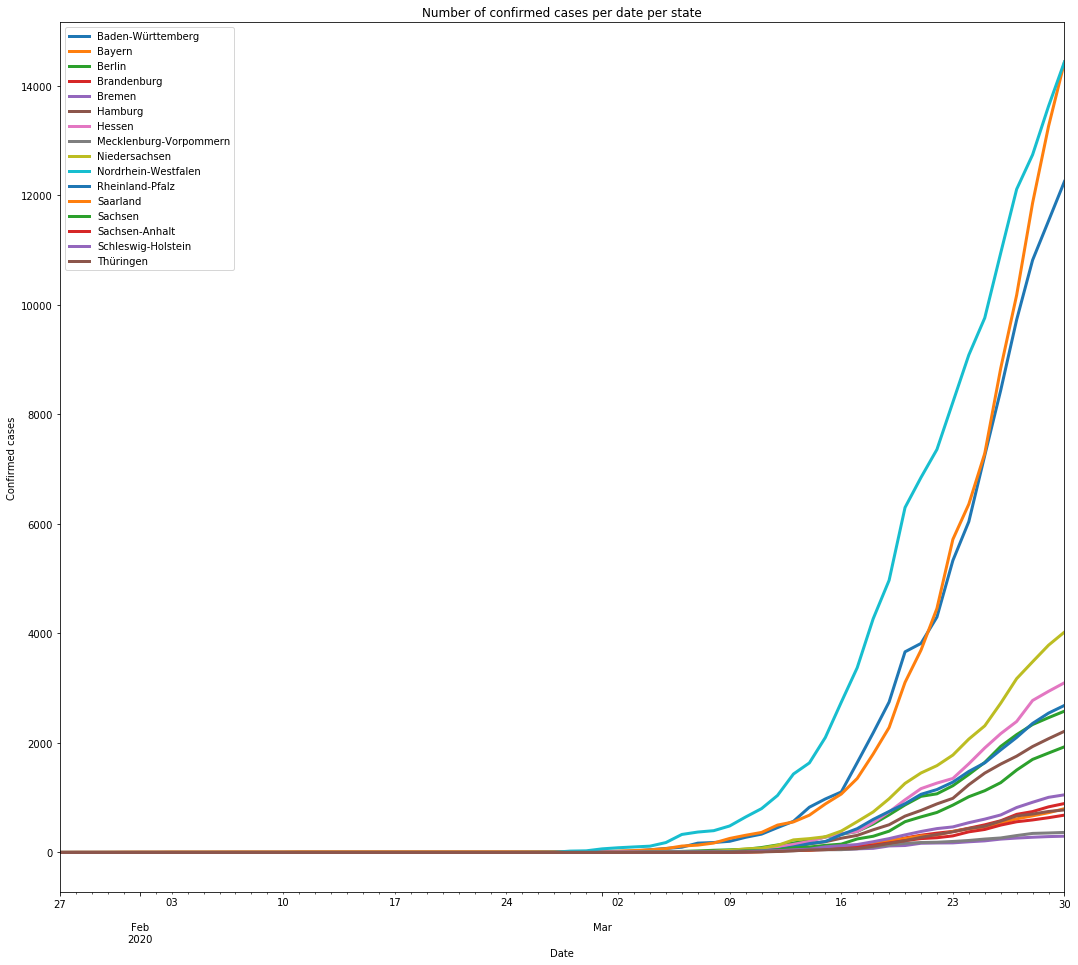

In [26]:
df_confirmed = df_to_TS(df_deutschland,'confirmed')
df_confirmed.plot(figsize=(18,16),linewidth=3.0)
plt.title('Number of confirmed cases per date per state')
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.show()

In order to be able to compare time series, it is important to use the same starting date for them. Here is a function that shifts the starting point of the series according to the number of confirmed cases

In [33]:
# Function to move the starting point of series to the date where 100 cases where confirmed
def df_shift(df,minimum_case=100):
    df_out = pd.DataFrame()
    for column in df:
        df_100 = df[column]
        df_100 = df_100[df_100>=minimum_case]
        df_100 = df_100.reset_index(drop=True)
        df_out = pd.concat([df_out,df_100],sort=True,axis=1,join='outer')
    return df_out

Here I assume after 20 cases the pandemic takes off.

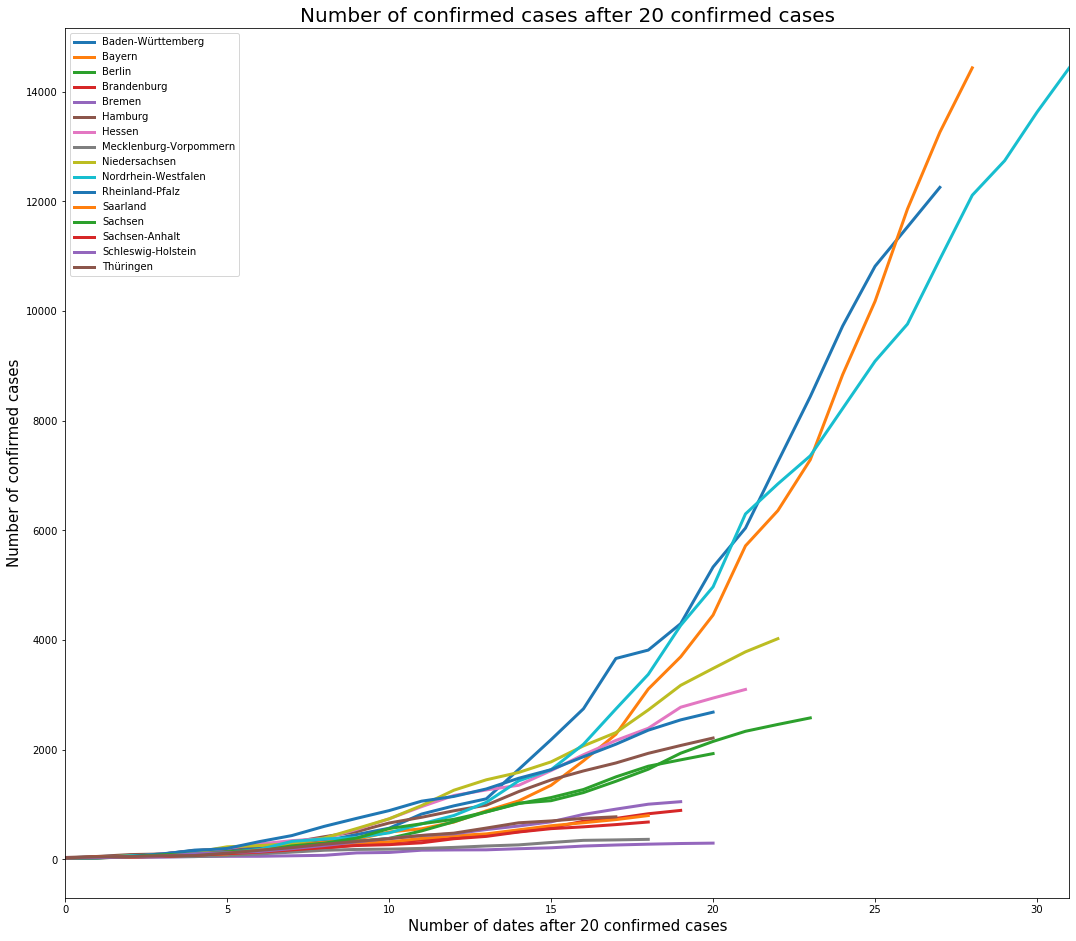

In [49]:
df_shifted = df_shift(df_confirmed,20)
df_shifted.plot(figsize=(18,16),linewidth=3.0)
plt.title('Number of confirmed cases after 20 confirmed cases', fontsize=20)
plt.xlabel('Number of dates after 20 confirmed cases', fontsize=15)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.show()

It is also interesting to look at the number of new cases per day

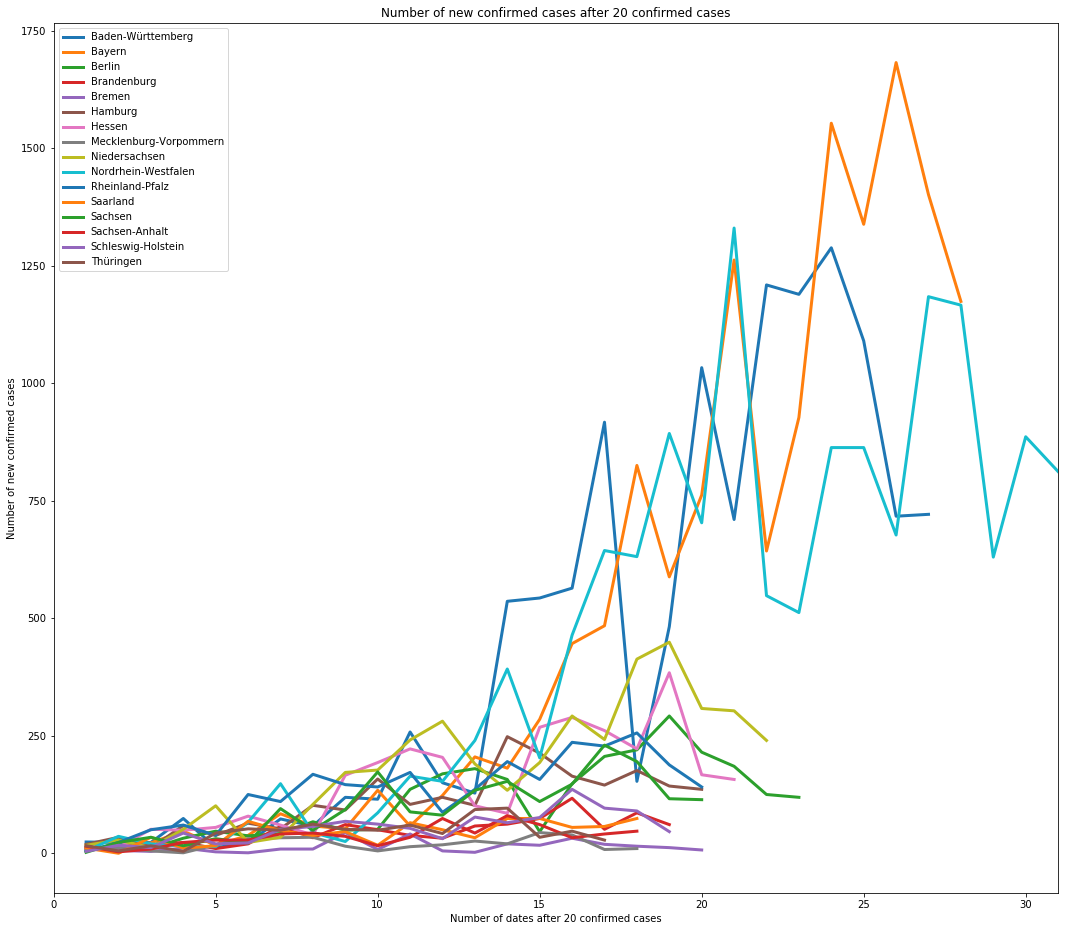

In [46]:
df_daily = df_shifted.diff()
df_daily.plot(figsize=(18,16),linewidth=3.0)
plt.title('Number of new confirmed cases after 20 confirmed cases')
plt.xlabel('Number of dates after 20 confirmed cases')
plt.ylabel('Number of new confirmed cases')
plt.show()